In [1]:
from src.models.modulated_siren import ModulatedSirenModel
from src.datasets.chairs import get_mgrid
import torch

/home/arkadi.piven/miniconda3/envs/gip_med_wsi_env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from src.models.modulated_siren import ModulatedSirenModel
import pytorch_lightning as pl

# Create an instance of the ModulatedSirenModel
model = ModulatedSirenModel(in_features=2, hidden_features=256, hidden_layers=9, out_features=3, outermost_linear=True, first_omega_0=30, hidden_omega_0=30.)

# Load the checkpoint
checkpoint_path = '/home/arkadi.piven/Code/functa/checkpoints/fit_chair_modulated/last.ckpt'
model = model.load_from_checkpoint(checkpoint_path, in_features=2, hidden_features=256, hidden_layers=9, out_features=3, outermost_linear=True, first_omega_0=30, hidden_omega_0=30.)

Chairs dataset initialized
Chair 1 shape torch.Size([3, 512, 512])
Coordinates shapes torch.Size([262144, 2])
c1 shape torch.Size([262144, 3])
tensor([[-1.0000, -1.0000, -1.0000],
        [-0.9922, -0.9922, -0.9922],
        [-1.0000, -1.0000, -1.0000],
        ...,
        [-1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000]])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[-0.9756, -0.9614, -0.9787],
        [-0.9756, -0.9614, -0.9787],
        [-0.9756, -0.9614, -0.9787],
        ...,
        [-0.9752, -0.9610, -0.9783],
        [-0.9752, -0.9609, -0.9782],
        [-0.9751, -0.9609, -0.9782]], grad_fn=<AddmmBackward0>)
torch.Size([1048576, 3])


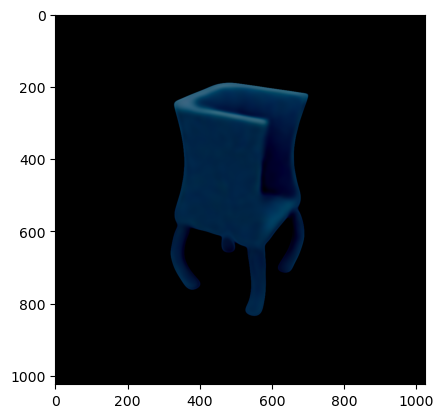

In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from src.datamodules.chairs_datamodule import ChairsDatamodule
import torchvision. transforms as T
from PIL import Image

# Define the grid
chairs = ChairsDatamodule("/home/arkadi.piven/Code/functa/rendered/chair", 1)
transform = T.ToPILImage()
coords, pixels = chairs.train_dataset[0]
coords = get_mgrid(1024, 2)
print(pixels)

# Pass the coordinates through the model
output = model(coords)
print(output)


# Reshape the output to (512, 512, 3)
print(output.shape)

# Plot the image
plt.imshow(output.view(1024,1024,3).detach().numpy())

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


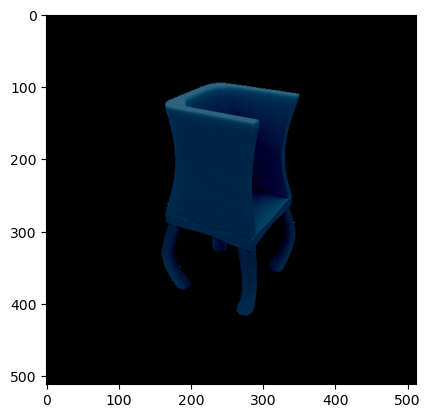

In [4]:
plt.imshow(pixels.view(512,512,3).detach().numpy())

In [27]:
from PIL import Image

image_path = '/Users/arkadipiven/Documents/Code/functa/rendered/chair/0bc2011018e2463ca119ebce4e15a94b/000.png'
image = Image.open(image_path).convert("RGB")

In [28]:
print(image.size)

(512, 512)


In [29]:
import numpy as np

image_array = np.array(image)
print(image_array.shape)

(512, 512, 3)


In [30]:
image_rgb = image.convert("RGB")

In [31]:
image_array = np.array(image_rgb)
print(image_array.shape)

(512, 512, 3)


In [32]:
print(image_array[0][0])

[0 0 0]


In [33]:
from src.datasets.chairs import Chairs

cd = Chairs("/Users/arkadipiven/Documents/Code/functa/rendered/chair")

Chairs dataset initialized


In [51]:
chair_1, chair_2 = cd[5]

x = np.arange(512)
y = np.arange(512)
xx, yy = np.meshgrid(x, y)

coordinates = np.stack([xx, yy], axis=-1)
coordinates_tensor = torch.tensor(coordinates, dtype=torch.float32).unsqueeze(0)
coordinates_tensor = coordinates_tensor.reshape(-1, 2)
print(coordinates_tensor.shape)
print(coordinates_tensor)

y_hat = s(coordinates_tensor)
print(y_hat)
loss = torch.nn.functional.mse_loss(y_hat, chair_1.reshape(-1, 3))
loss

# s.forward(chair_1)

torch.Size([262144, 2])
tensor([[  0.,   0.],
        [  1.,   0.],
        [  2.,   0.],
        ...,
        [509., 511.],
        [510., 511.],
        [511., 511.]])
tensor([[ 0.6025,  0.9461,  0.2877],
        [-0.2260,  0.7866,  0.5828],
        [ 0.4106,  0.9479, -0.5832],
        ...,
        [-0.0316,  0.4697,  0.1416],
        [ 0.3046,  0.9991,  0.7341],
        [-0.1286,  0.6190,  0.9047]], grad_fn=<SinBackward0>)


tensor(2690.5525, grad_fn=<MseLossBackward0>)

In [22]:
print(cd[1500])

IndexError: list index out of range